# Visualizing Earnings Based On College Majors

In this project we will explore a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repository](https://github.com/fivethirtyeight/data/tree/master/college-majors). 

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries and more. Here are some of the columns in the dataset:

* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.


We'll start importing the libraries we need and exploring the data set:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


We'll drop the rows with missing values because they could cause matplotlib to throw errors.

In [6]:
raw_data_count = recent_grads.shape[0]
print("Number of rows before we drop rows with missing values: ",raw_data_count)

Number of rows before we drop rows with missing values:  173


In [7]:
recent_grads = recent_grads.dropna()

In [8]:
raw_data_count = recent_grads.shape[0]
print("Number of rows after we drop rows with missing values: ",raw_data_count)

Number of rows after we drop rows with missing values:  172


## Exploring the data with Pandas - Scatter

Now we'll use the method DataFrame.plot() from pandas, to explore different relations in the data:

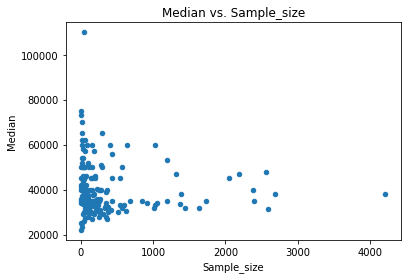

In [9]:
ax1 = recent_grads.plot(x="Sample_size", y="Median", kind="scatter")
ax1.set_title("Median vs. Sample_size")
ax1.figsize = (5,10)

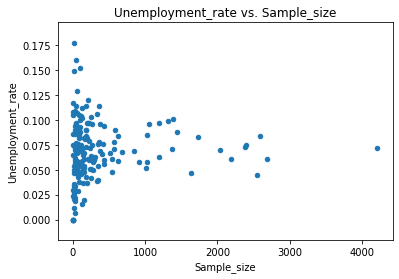

In [10]:
ax2 = recent_grads.plot(x="Sample_size", y="Unemployment_rate", kind="scatter")
ax2.set_title("Unemployment_rate vs. Sample_size")
ax2.figsize = (5,10)

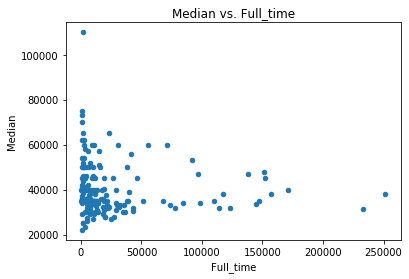

In [11]:
ax3 = recent_grads.plot(x="Full_time", y="Median", kind="scatter")
ax3.set_title("Median vs. Full_time")
ax3.figsize = (5,10)

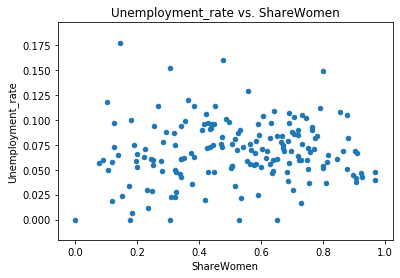

In [12]:
ax4 = recent_grads.plot(x="ShareWomen", y="Unemployment_rate", kind="scatter")
ax4.set_title("Unemployment_rate vs. ShareWomen")
ax4.figsize = (5,10)

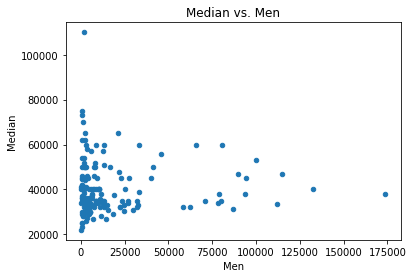

In [13]:
ax5 = recent_grads.plot(x="Men", y="Median", kind="scatter")
ax5.set_title("Median vs. Men")
ax5.figsize = (5,10)

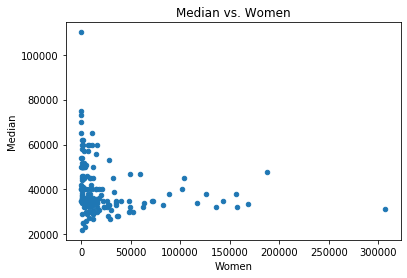

In [14]:
ax6 = recent_grads.plot(x="Women", y="Median", kind="scatter")
ax6.set_title("Median vs. Women")
ax6.figsize = (5,10)

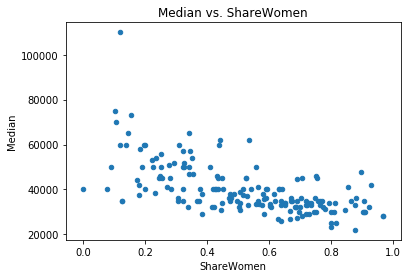

In [15]:
ax7 = recent_grads.plot(x="ShareWomen", y="Median", kind="scatter")
ax7.set_title("Median vs. ShareWomen")
ax7.figsize = (5,10)

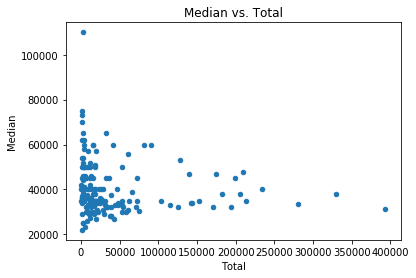

In [16]:
ax8 = recent_grads.plot(x="Total", y="Median", kind="scatter")
ax8.set_title("Median vs. Total")
ax8.figsize = (5,10)

## Exploring the data with Pandas - Histograms

To explore the distribution of values in a column, we'll use histograms of matplotlib.

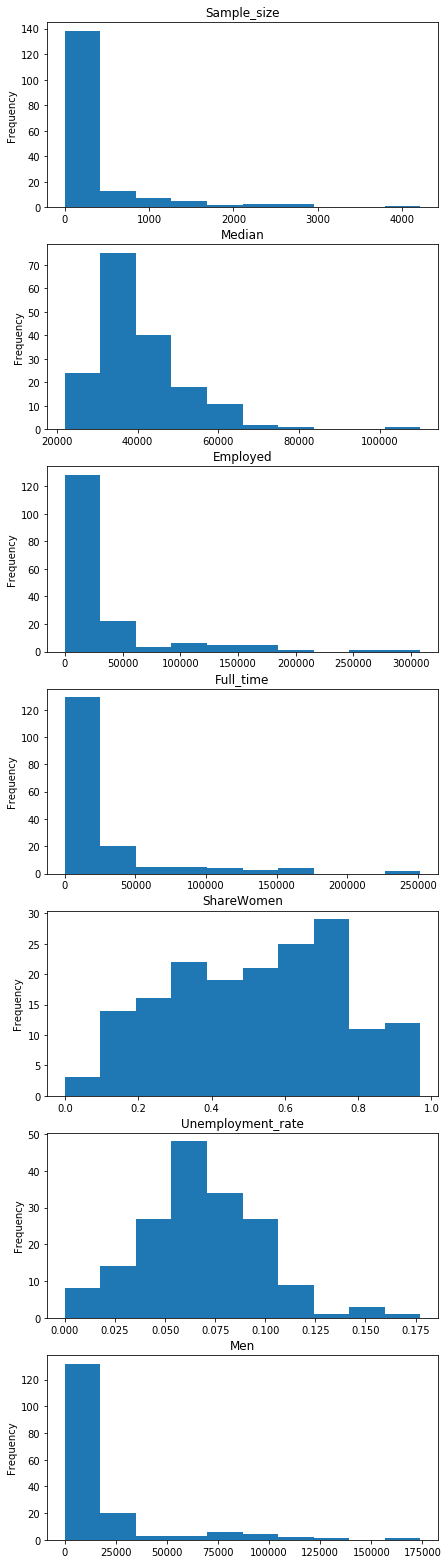

In [17]:
cols = ["Sample_size", "Median", "Employed", "Full_time",
        "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(7,32))

for r in range(1,8):
    ax = fig.add_subplot(8,1,r)
    plt.title(cols[r-1])
    ax = recent_grads[cols[r-1]].plot(kind='hist', rot=0)

## Using Scatter Matrix Plot from Pandas

Previously, we have used scatter plots to visualize potential relationships betweem columns and histograms to visualize the distributions of individual columns, now we'll use a scatter matrix plot to combine scatter plots and histograms into one grid of plots, allowing us to explore potential relationships and distributions simultaneously.

In [18]:
from pandas.plotting import scatter_matrix 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000C02C658088>,
      dtype=object)

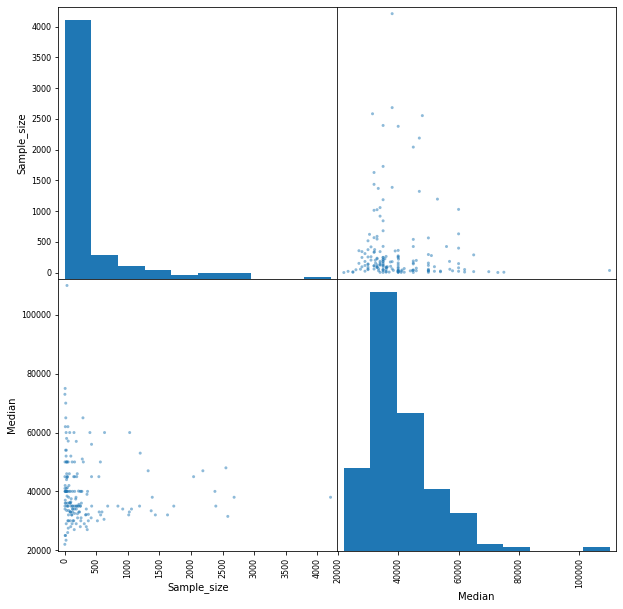

In [19]:
scatter_matrix(recent_grads[["Sample_size", "Median"]], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000C02C2BC708>,
      dtype=object)

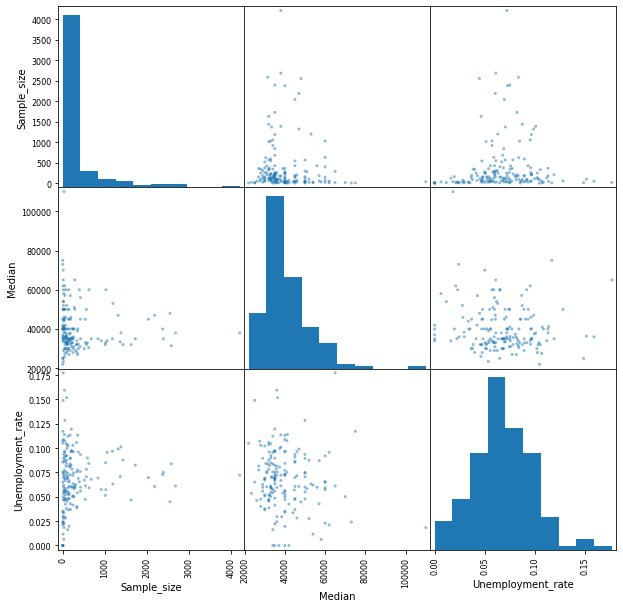

In [20]:
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]], figsize=(10,10))

## Exploring the data with Pandas - Bar Plots

Finally we'll use the DataFrame.plot.bar() method of Pandas, to visually compare the percentages of women and the unemployment rate from the first ten rows and last ten rows of the dataframe.

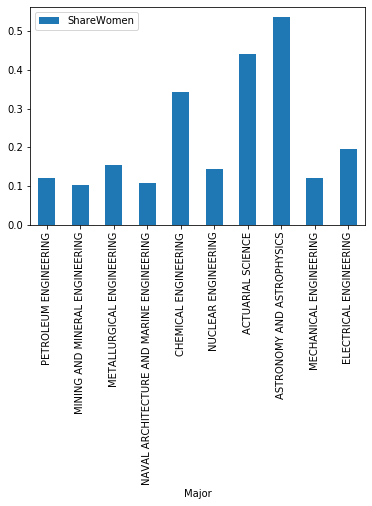

In [21]:
recent_grads[:10].plot.bar(x="Major", y="ShareWomen", legend = True)

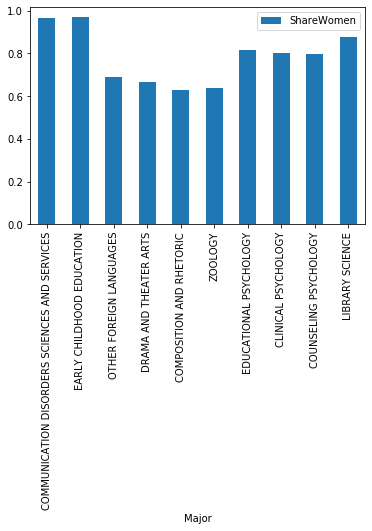

In [22]:
recent_grads[-10:].plot.bar(x="Major", y="ShareWomen", legend = True)

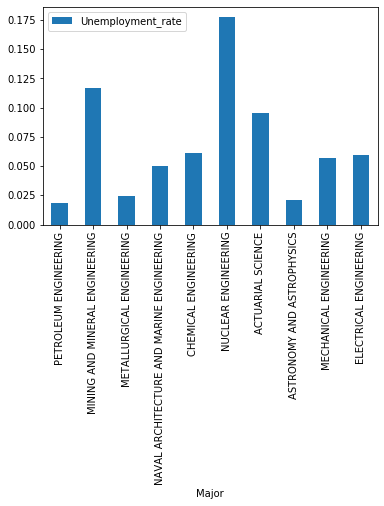

In [23]:
recent_grads[:10].plot.bar(x="Major", y="Unemployment_rate", legend = True)

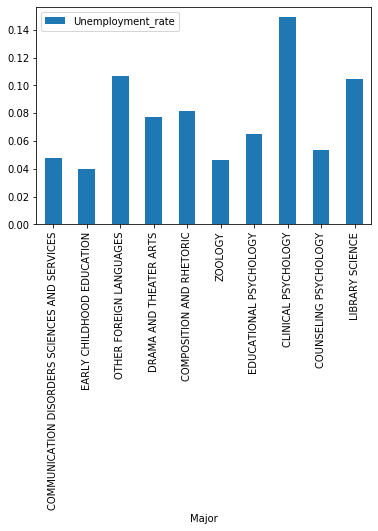

In [24]:
recent_grads[-10:].plot.bar(x="Major", y="Unemployment_rate", legend = True)